# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline #permite que eu veja o gráfico inline

UsageError: unrecognized arguments: #permite que eu veja o gráfico inline


In [21]:
df = pd.read_csv('multipleChoiceResponses.csv', encoding="ISO-8859-1")
df.head()

/home/cintia/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Histogramas

Vamos analisar a idade dos cientistas de dados dessa pesquisa. Qual a idade média? Quantos anos tem a pessoa mais velha dessa pesquisa? 

Para conseguir usar o `countplot` vamos transformar `Age` para inteiro para poder enxergar os numeros melhor

In [53]:
df_copy = df.copy()

In [23]:
df.Age.isnull().sum()

331

In [24]:
# vamos preencher os nulos da variável "Age" com zeros
df['Age'] = df.Age.fillna(0).astype(int)

Vamos ver um histograma da idade dos participantes

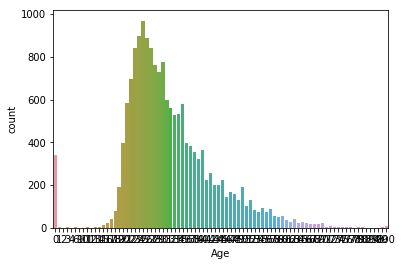

In [25]:
# Agora fazer um countplot com essa variável
_ = sns.countplot(x='Age', data=df) # _ oculta o objeto e não importa a variável

Ficou horrível...

Vamos adicionar o titulo e aumentar o gráfico

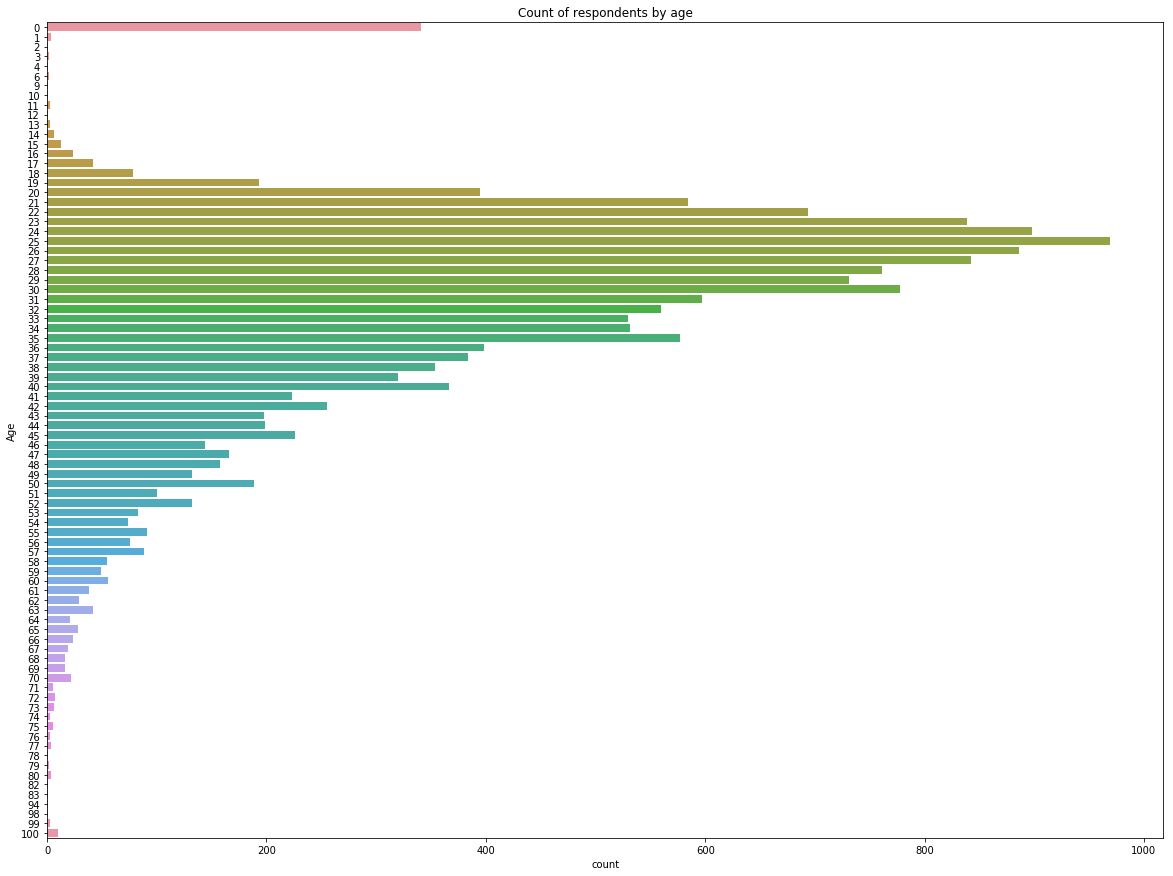

In [26]:
# Um countplot maior e na horizontal
plt.subplots(figsize=(20,15))
plot = sns.countplot(y='Age', data=df).set_title('Count of respondents by age')

E se eu não quiser um eixo x mais limpo? Só para ver a distribuição em si?

/home/cintia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


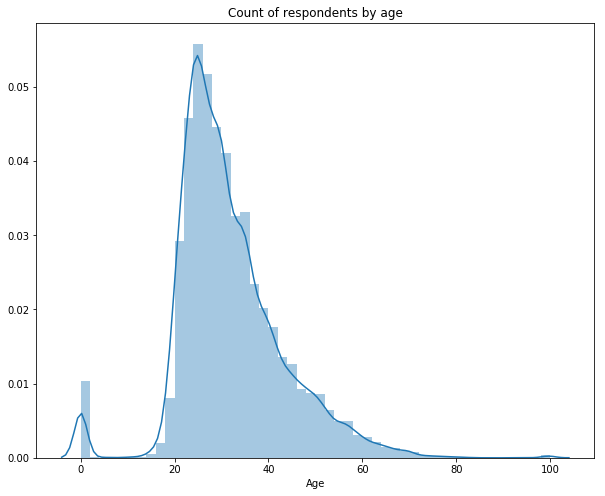

In [27]:
# agora um distplot
plt.subplots(figsize=(10,8))
_ = sns.distplot(df['Age']).set_title('Count of respondents by age')

E para remover a curva de tendencia?

/home/cintia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


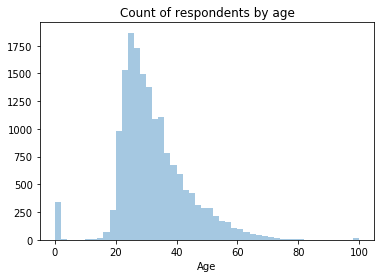

In [28]:
# remover o kde
_ = sns.distplot(df['Age'], kde=False).set_title('Count of respondents by age')

**Nota**: Distplot não aceita Nulos. O grande número de pessoas que ficaram com idade zero na verdade são pessoas que não preencheram. 

### Desafio 1

Ao invés de substituir os valores nulos pelo número zero, substitua-os pelo valor médio da idade no dataset. Plot a idade novamente. Além disso, troque as cores do gráfico. Para isso use [o guia de paletas do seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial).

![monstros_sa](https://media.giphy.com/media/zxxXYJqTlpBnO/giphy.gif)

In [65]:
df_copy = df.copy()
df_copy.Age.head(20)

0      0
1     30
2     28
3     56
4     38
5     46
6     35
7     22
8     43
9     33
10    20
11    27
12    26
13    54
14    26
15    58
16    58
17    24
18    26
19    39
Name: Age, dtype: int64

In [66]:
df_copy['Age'].isnull().sum()

0

/home/cintia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


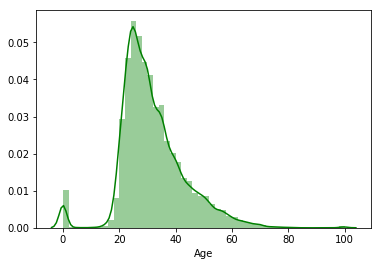

In [67]:
# faça o desafio aqui
mean_age = df_copy.Age.mean()
mean_age = int(mean_age)

df_copy['Age'] = df_copy['Age'].fillna(mean_age)
_ = sns.distplot(df_copy['Age'], color='g')

### Como seria o mesmo histograma usando apenas matplotlib?

/home/cintia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


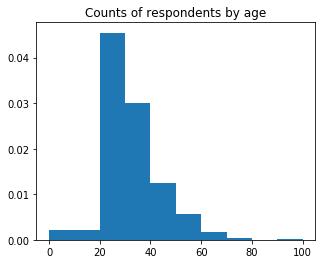

In [71]:
# com matplotlib
plt.subplots(figsize=(5,4))
_ = plt.hist(df_copy['Age'], normed=True)
_ = plt.title('Counts of respondents by age')